# Project 2020 - Fundamentals of Data Analysis

---

### Project requirements:

Perform and explain simple linear regression using Python on the **powerproduction** dataset.
The goal is to;
- accurately predict wind turbine power output from wind speed values using the data set as a basis.
 1. using simple linear regression on the data set.
 2. In that notebook, an explanation of your regression and an analysis of its accuracy.

#### Methodology:

* Importing the data set
* Explore the data set
* Perform Analysis


To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

_The data set is split into **train** and **test** sets, with **302** rows used for **model training** and **149** for **model evaluation**._

### _Automatic Outlier Detection_

The scikit-learn library provides a number of built-in automatic methods for identifying outliers in data. Each method will be defined, then fit on the training dataset. The fit model will then predict which examples in the training dataset are outliers and which are not (so-called inliers). The outliers will then be removed from the training dataset, then the model will be fit on the remaining examples and evaluated on the entire test dataset.

It would be invalid to fit the outlier detection method on the entire training dataset as this would result in data leakage. That is, the model would have access to data (or information about the data) in the test set not used to train the model. This may result in an optimistic estimate of model performance.

One approach might be to return a “None” indicating that the model is unable to make a prediction on those outlier cases. This might be an interesting extension to explore that may be appropriate for your project [3].


#### _Isolation Forest_

Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space. The scikit-learn library provides an implementation of Isolation Forest in the IsolationForest class.

The most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between `0.0` and `0.5` and by default is set to `0.1` [3].



### _Baseline Model Performance_

It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric.
In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).



In [1]:
# Getting plotts inline

%matplotlib inline

# importing required packages and libraries
# numerical library
import numpy as np
rng = np.random.default_rng()
# data frames
import pandas as pd
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Libraries.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)
# Nicer colours and styles for plots.
# plt.style.use("ggplot")
plt.style.use("fivethirtyeight")

In [28]:
# Assigning variables.
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df = pd.read_csv(url)
df = df[df != 0].dropna()
# retrieve the array
data = df.values
# split into input and output elements
speed, power = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(speed.shape, power.shape)
x = speed.reshape(-1, 1)
y = power

(451, 1) (451,)


In [29]:
# transformer refers to an instance of PolynomialFeatures which you can use to transform the input x (speed).
transformer = PolynomialFeatures(degree=4, include_bias=False)

In [30]:
# Fitting transformer with x (speed).
transformer.fit(x)

PolynomialFeatures(degree=4, include_bias=False)

In [31]:
# Create a new and modified input.
x_ = transformer.transform(x)

In [32]:
# summarizing the earlier 3 steps with one line of code.
x_ = PolynomialFeatures(degree= 4, include_bias=False).fit_transform(x)

In [33]:
# create and fit the model.
m = LinearRegression().fit(x_, y)

In [34]:
# Getting the R-square
r_sq = m.score(x_, y)
print('coefficient of determination:', r_sq)

print('intercept:', m.intercept_)

print('coefficients:', m.coef_)

p = [m.intercept_, m.coef_]

print ('p :', p)

coefficient of determination: 0.9790166581245356
intercept: 13.687463329439431
coefficients: [-7.72667030e+00  1.05079599e+00 -9.03410607e-03 -6.48277387e-04]
p : [13.687463329439431, array([-7.72667030e+00,  1.05079599e+00, -9.03410607e-03, -6.48277387e-04])]


In [35]:
# Getting very similar results with different transformation arguments.
x_ = PolynomialFeatures(degree= 4, include_bias=True).fit_transform(x)

In [36]:
print(x_)

[[1.00000000e+00 3.25000000e-01 1.05625000e-01 3.43281250e-02
  1.11566406e-02]
 [1.00000000e+00 4.00000000e-01 1.60000000e-01 6.40000000e-02
  2.56000000e-02]
 [1.00000000e+00 4.50000000e-01 2.02500000e-01 9.11250000e-02
  4.10062500e-02]
 ...
 [1.00000000e+00 2.43490000e+01 5.92873801e+02 1.44358842e+04
  3.51499344e+05]
 [1.00000000e+00 2.43740000e+01 5.94091876e+02 1.44803954e+04
  3.52945157e+05]
 [1.00000000e+00 2.43990000e+01 5.95311201e+02 1.45249980e+04
  3.54395426e+05]]


In [37]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [38]:
# Getting similar results to the previous case.
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)


coefficient of determination: 0.9790166581245356
intercept: 0.0
coefficients: [ 1.36874633e+01 -7.72667030e+00  1.05079599e+00 -9.03410607e-03
 -6.48277387e-04]


In [39]:
# predict the response (power)
y_pred = model.predict(x_)
print('predicted response:', y_pred)

predicted response: [ 1.12869685e+01  1.07643278e+01  1.04223981e+01  1.00789755e+01
  9.91260041e+00  9.74751969e+00  9.58373232e+00  9.26003370e+00
  8.94149660e+00  8.78416111e+00  8.16768248e+00  8.01677351e+00
  7.86714674e+00  7.42594903e+00  7.28144046e+00  7.13820877e+00
  6.99625288e+00  6.71616414e+00  6.44116546e+00  6.17124798e+00
  5.64662066e+00  5.51862545e+00  4.89756137e+00  4.77712274e+00
  4.41869282e+00  3.74517708e+00  3.53063911e+00  2.81880455e+00
  2.72205534e+00  1.73879933e+00  1.57589560e+00  1.04389799e+00
  8.33988376e-01  6.32294392e-01  5.68364230e-01  2.66591450e-01
 -5.52165513e-03 -5.64017601e-02 -2.48164992e-01 -3.37014054e-01
 -3.79685928e-01 -4.21191470e-01 -4.61532265e-01 -6.45820979e-01
 -8.55357198e-01 -8.80703387e-01 -9.04907672e-01 -9.91101971e-01
 -1.04313289e+00 -1.05821774e+00 -1.09672013e+00 -1.10730932e+00
 -1.15018495e+00 -1.15186723e+00 -1.15244418e+00 -1.15191760e+00
 -1.10819664e+00 -1.04548355e+00 -1.02970054e+00 -8.63875601e-01
 -8.3

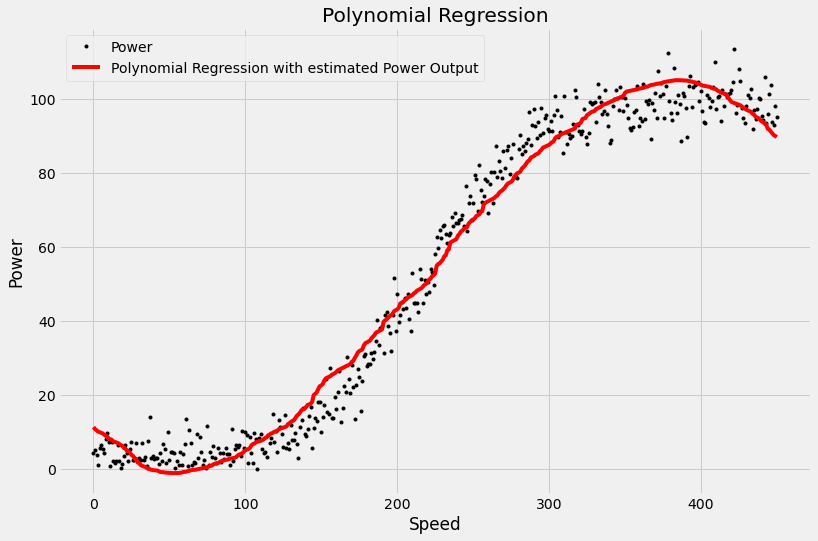

In [40]:
plt.plot(y, "k.", label = "Power")
plt.plot(y_pred, "r-", label = "Polynomial Regression with estimated Power Output")
plt.title("Polynomial Regression")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()

## References

[1] Functions to draw linear regression models ; https://seaborn.pydata.org/tutorial/regression.html#functions-to-draw-linear-regression-models

[2] Ian McLoughlin; Models : https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

[3] 4 Automatic Outlier Detection Algorithms in Python : https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

[4] Matplotlib : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

[5] KDnuggets : https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html

[6] RealPython ; Linear Regression in Python : https://realpython.com/linear-regression-in-python/

[7] Statistics By Jim : https://statisticsbyjim.com/regression/choosing-regression-analysis/

[8] Wikipedia ; polynomial regression: https://en.wikipedia.org/wiki/Polynomial_regression

## End